##### Task: Obtain the xg shot and other parameters and with help of those draw a correlation graph and find the relavant factors involved in a goal or expected Goal Shots

In [35]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from pymongo import MongoClient
import matplotlib.pyplot as plt

In [36]:
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [37]:
client=MongoClient('localhost',27017)
db=client['Wyscout']

In [137]:
# To print multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [39]:
totalXgShots=db.player_advance_stats.aggregate([
{'$unwind': "$total"},
{'$project':{ "_id":0,"playerId":1,"competitionId":1,"seasonId":1,"total.matches" : 1,	"total.matchesInStart" : 1,	"total.matchesSubstituted" : 1,	"total.matchesComingOff" : 1,	"total.minutesOnField" : 1,	"total.minutesTagged" : 1,	"total.goals" : 1,	"total.assists" : 1,	"total.shots" : 1,
	"total.headShots" : 1,	"total.yellowCards" : 1,	"total.redCards" : 1,	"total.directRedCards" : 1,	"total.penalties" : 1,	"total.linkupPlays" : 1,	"total.duels" : 1,	"total.duelsWon" : 1,	"total.defensiveDuels" : 1,
	"total.defensiveDuelsWon" : 1,	"total.offensiveDuels" : 1,	"total.offensiveDuelsWon" : 1,	"total.aerialDuels" : 1,	"total.aerialDuelsWon" : 1,	"total.fouls" : 1,	"total.passes" : 1,	"total.successfulPasses" : 1,
	"total.smartPasses" : 1,	"total.successfulSmartPasses" : 1,	"total.passesToFinalThird" : 1,	"total.successfulPassesToFinalThird" : 1,	"total.crosses" : 1,	"total.successfulCrosses" : 1,	"total.forwardPasses" : 1,
	"total.successfulForwardPasses" : 1,	"total.backPasses" : 1,	"total.successfulBackPasses" : 1,	"total.throughPasses" : 1,	"total.successfulThroughPasses" : 1,	"total.keyPasses" : 1,	"total.successfulKeyPasses" : 1,
	"total.verticalPasses" : 1,	"total.successfulVerticalPasses" : 1,	"total.longPasses" : 1,	"total.successfulLongPasses" : 1,	"total.dribbles" : 1,	"total.successfulDribbles" : 1,	"total.interceptions" : 1,	"total.defensiveActions" : 1,
	"total.successfulDefensiveAction" : 1,	"total.attackingActions" : 1,	"total.successfulAttackingActions" : 1,	"total.freeKicks" : 1,	"total.freeKicksOnTarget" : 1,	"total.directFreeKicks" : 1,	"total.directFreeKicksOnTarget" : 1,
	"total.corners" : 1,	"total.successfulPenalties" : 1,	"total.successfulLinkupPlays" : 1,	"total.accelerations" : 1,	"total.pressingDuels" : 1,	"total.pressingDuelsWon" : 1,	"total.looseBallDuels" : 1,	"total.looseBallDuelsWon" : 1,
	"total.missedBalls" : 1,	"total.shotAssists" : 1,	"total.shotOnTargetAssists" : 1,	"total.recoveries" : 1,	"total.opponentHalfRecoveries" : 1,	"total.dangerousOpponentHalfRecoveries" : 1,	"total.losses" : 1,	"total.ownHalfLosses" : 1,
	"total.dangerousOwnHalfLosses" : 1,	"total.xgShot" : 1,	"total.xgAssist" : 1,	"total.xgSave" : 1,	"total.receivedPass" : 1,	"total.touchInBox" : 1,	"total.progressiveRun" : 1,	"total.fieldAerialDuels" : 1,	"total.fieldAerialDuelsWon" : 1,
	"total.gkCleanSheets" : 1,	"total.gkConcededGoals" : 1,	"total.gkShotsAgainst" : 1,	"total.gkExits" : 1,	"total.gkSuccessfulExits" : 1,	"total.gkAerialDuels" : 1,	"total.gkAerialDuelsWon" : 1,	"total.gkSaves" : 1,
	"total.newDuelsWon" : 1,	"total.newDefensiveDuelsWon" : 1,	"total.newOffensiveDuelsWon" : 1,	"total.newSuccessfulDribbles" : 1,	"total.lateralPasses" : 1,	"total.successfulLateralPasses" : 1}},
])
totalXgShots_df=pd.DataFrame(totalXgShots)
totalXgShots_df.head(5)

,playerId,competitionId,seasonId,total
0,3319,364,185727,"{'matches': 18, 'matchesInStart': 18, 'matches..."
1,3647,364,185727,"{'matches': 2, 'matchesInStart': 2, 'matchesSu..."
2,7848,364,185727,"{'matches': 1, 'matchesInStart': 0, 'matchesSu..."
3,7892,364,185727,"{'matches': 26, 'matchesInStart': 25, 'matches..."
4,14687,364,185727,"{'matches': 19, 'matchesInStart': 19, 'matches..."


In [40]:
# each col is separated from 'total'
totalXgShots_df = pd.concat([totalXgShots_df.drop(['total'], axis=1), pd.DataFrame(totalXgShots_df['total'].to_list())], axis=1)
totalXgShots_df.head(5)

,playerId,competitionId,seasonId,matches,matchesInStart,matchesSubstituted,matchesComingOff,minutesOnField,minutesTagged,goals,...,gkSuccessfulExits,gkAerialDuels,gkAerialDuelsWon,gkSaves,newDuelsWon,newDefensiveDuelsWon,newOffensiveDuelsWon,newSuccessfulDribbles,lateralPasses,successfulLateralPasses
0,3319,364,185727,18,18,11,0,1521,1521,1,...,0,0,0,0,101,42,42,14,235,214
1,3647,364,185727,2,2,1,0,121,121,0,...,0,0,0,0,9,3,0,0,49,47
2,7848,364,185727,1,0,0,1,61,61,0,...,0,1,1,3,1,0,0,0,14,14
3,7892,364,185727,26,25,0,1,2384,2384,2,...,0,0,0,0,162,59,16,7,684,663
4,14687,364,185727,19,19,1,0,1831,1831,2,...,0,0,0,0,170,76,16,4,425,417


In [51]:
totalXgShots_df=totalXgShots_df.dropna()   # remove rows that have 'NaN'
totalXgShots_df.head(3)

,playerId,competitionId,seasonId,matches,matchesInStart,matchesSubstituted,matchesComingOff,minutesOnField,minutesTagged,goals,...,gkSuccessfulExits,gkAerialDuels,gkAerialDuelsWon,gkSaves,newDuelsWon,newDefensiveDuelsWon,newOffensiveDuelsWon,newSuccessfulDribbles,lateralPasses,successfulLateralPasses
0,3319,364,185727,18,18,11,0,1521,1521,1,...,0,0,0,0,101,42,42,14,235,214
3,7892,364,185727,26,25,0,1,2384,2384,2,...,0,0,0,0,162,59,16,7,684,663
4,14687,364,185727,19,19,1,0,1831,1831,2,...,0,0,0,0,170,76,16,4,425,417


### Plot the scatter plots (using pairplot) for xgShot vs all the attributes to choose those that have high correlation

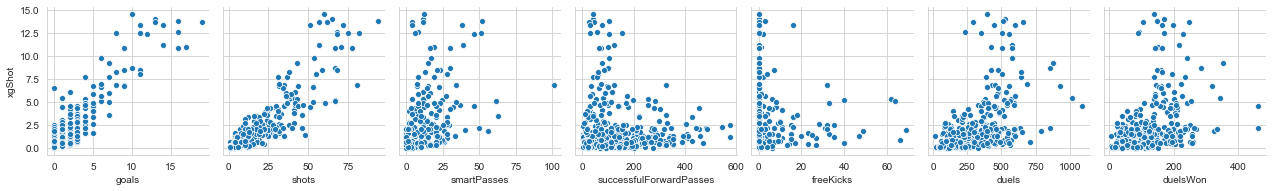

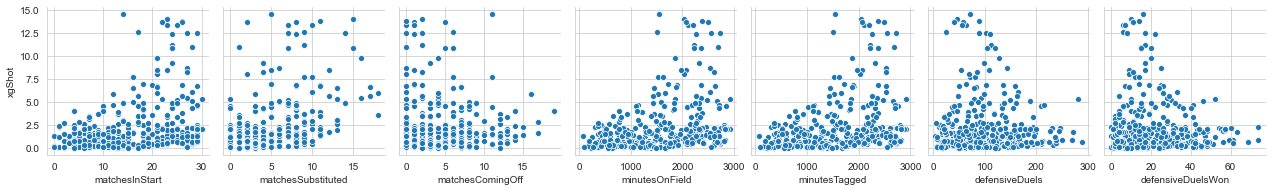

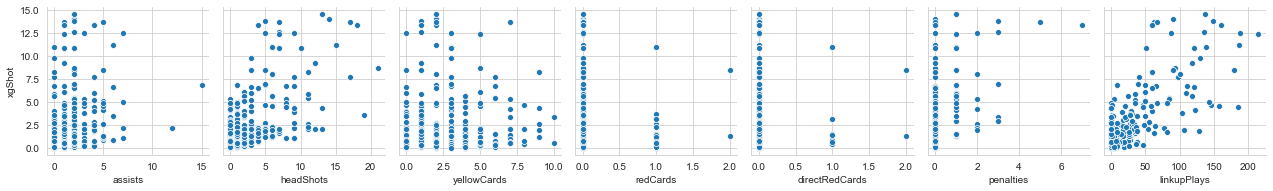

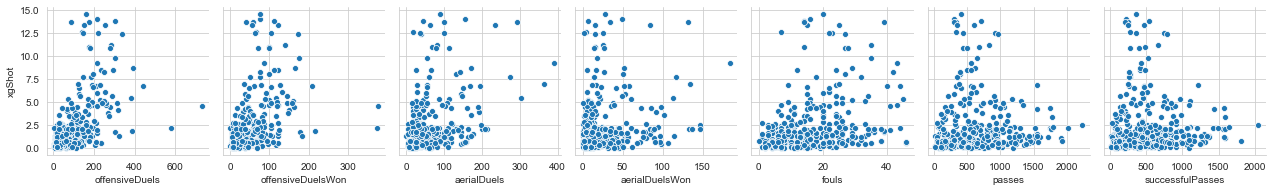

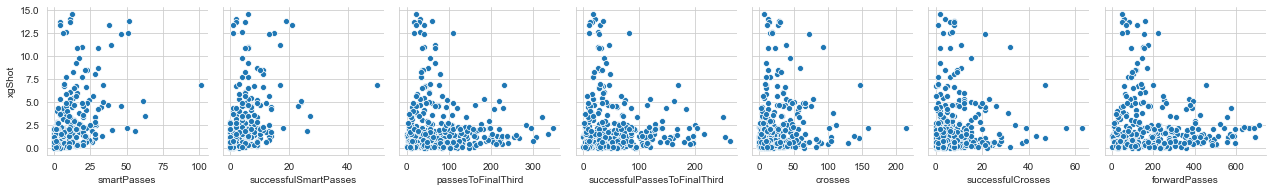

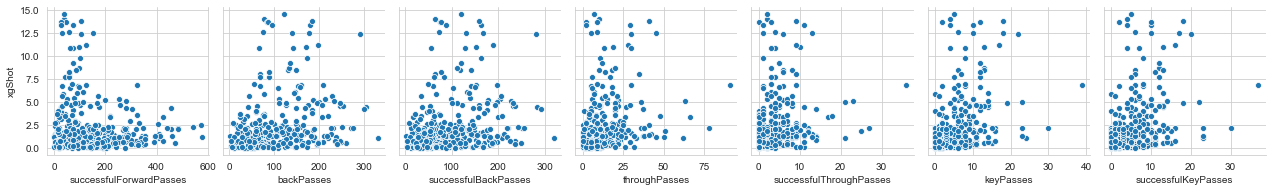

In [52]:
pp1 = sns.pairplot(data=totalXgShots_df,
                  y_vars=['xgShot'],
                  x_vars=['goals', 'shots', 'smartPasses','successfulForwardPasses','freeKicks','duels','duelsWon'])
pp1

pp2 = sns.pairplot(data=totalXgShots_df,
                  y_vars=['xgShot'],
                  x_vars=['matchesInStart', 'matchesSubstituted', 'matchesComingOff','minutesOnField','minutesTagged','defensiveDuels','defensiveDuelsWon'])
pp2

pp3 = sns.pairplot(data=totalXgShots_df,
                  y_vars=['xgShot'],
                  x_vars=['assists', 'headShots', 'yellowCards','redCards','directRedCards','penalties','linkupPlays'])
pp3

pp4 = sns.pairplot(data=totalXgShots_df,
                  y_vars=['xgShot'],
                  x_vars=['offensiveDuels', 'offensiveDuelsWon', 'aerialDuels','aerialDuelsWon','fouls','passes','successfulPasses'])
pp4

pp5 = sns.pairplot(data=totalXgShots_df,
                  y_vars=['xgShot'],
                  x_vars=['smartPasses', 'successfulSmartPasses', 'passesToFinalThird','successfulPassesToFinalThird','crosses','successfulCrosses','forwardPasses'])
pp5

pp6 = sns.pairplot(data=totalXgShots_df,
                  y_vars=['xgShot'],
                  x_vars=['successfulForwardPasses', 'backPasses', 'successfulBackPasses','throughPasses','successfulThroughPasses','keyPasses','successfulKeyPasses'])
pp6

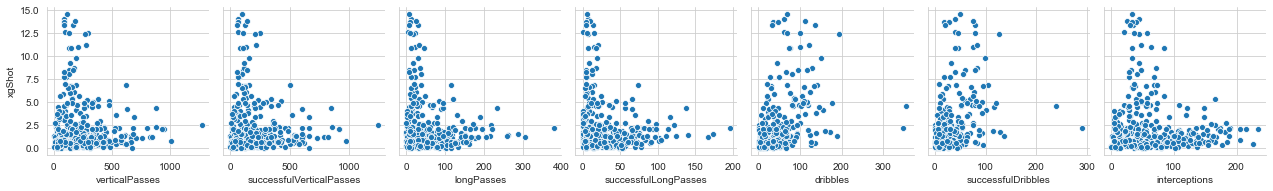

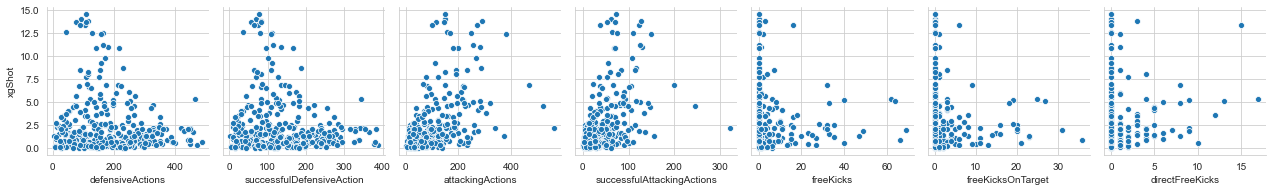

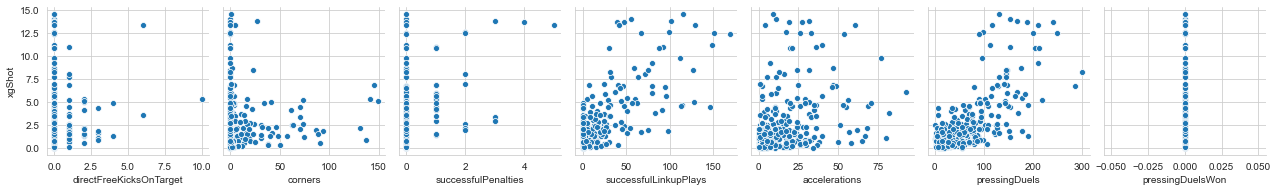

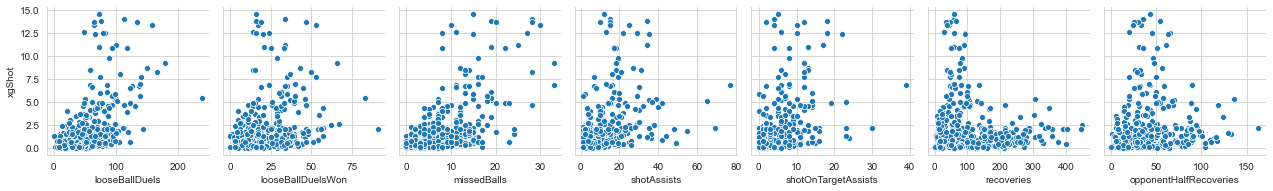

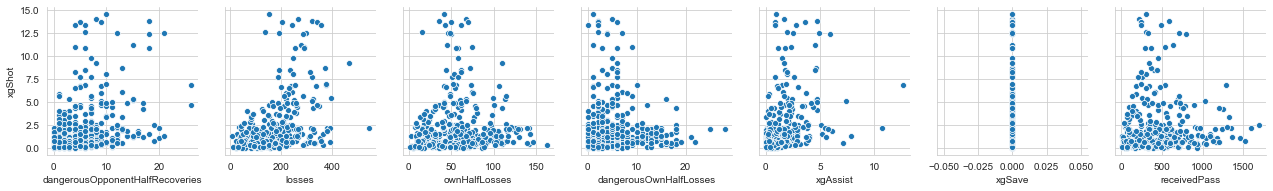

In [53]:
pp7 = sns.pairplot(data=totalXgShots_df,
                  y_vars=['xgShot'],
                  x_vars=['verticalPasses', 'successfulVerticalPasses', 'longPasses','successfulLongPasses','dribbles','successfulDribbles','interceptions'])
pp7

pp8 = sns.pairplot(data=totalXgShots_df,
                  y_vars=['xgShot'],
                  x_vars=['defensiveActions', 'successfulDefensiveAction', 'attackingActions','successfulAttackingActions','freeKicks','freeKicksOnTarget','directFreeKicks'])
pp8

pp9 = sns.pairplot(data=totalXgShots_df,
                  y_vars=['xgShot'],
                  x_vars=['directFreeKicksOnTarget', 'corners', 'successfulPenalties','successfulLinkupPlays','accelerations','pressingDuels','pressingDuelsWon'])
pp9

pp9 = sns.pairplot(data=totalXgShots_df,
                  y_vars=['xgShot'],
                  x_vars=['looseBallDuels', 'looseBallDuelsWon', 'missedBalls','shotAssists','shotOnTargetAssists','recoveries','opponentHalfRecoveries'])
pp9

pp10 = sns.pairplot(data=totalXgShots_df,
                  y_vars=['xgShot'],
                  x_vars=['dangerousOpponentHalfRecoveries', 'losses', 'ownHalfLosses','dangerousOwnHalfLosses','xgAssist','xgSave','receivedPass'])
pp10

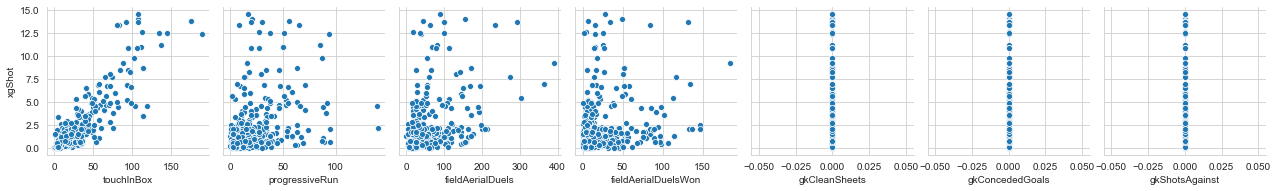

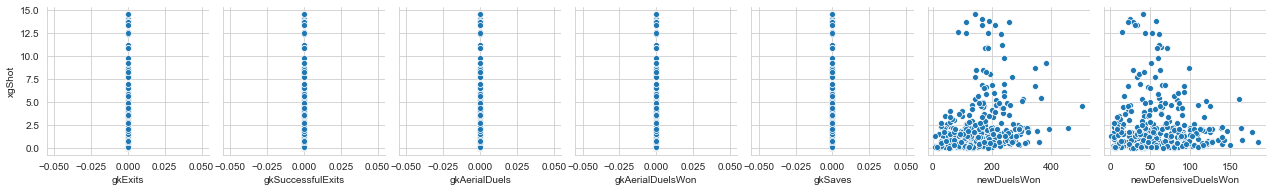

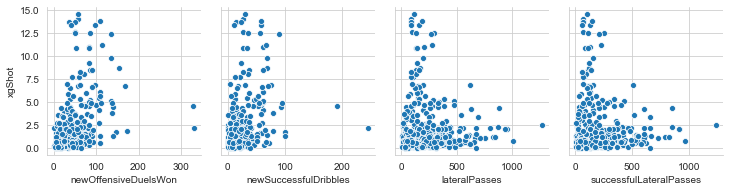

In [54]:
pp11 = sns.pairplot(data=totalXgShots_df,
                  y_vars=['xgShot'],
                  x_vars=['touchInBox', 'progressiveRun', 'fieldAerialDuels','fieldAerialDuelsWon','gkCleanSheets','gkConcededGoals','gkShotsAgainst'])
pp11

pp12 = sns.pairplot(data=totalXgShots_df,
                  y_vars=['xgShot'],
                  x_vars=['gkExits', 'gkSuccessfulExits', 'gkAerialDuels','gkAerialDuelsWon','gkSaves','newDuelsWon','newDefensiveDuelsWon'])
pp12

pp13 = sns.pairplot(data=totalXgShots_df,
                  y_vars=['xgShot'],
                  x_vars=['newOffensiveDuelsWon', 'newSuccessfulDribbles', 'lateralPasses','successfulLateralPasses'])
pp13

### Correlation coefficient : xgShots vs shots

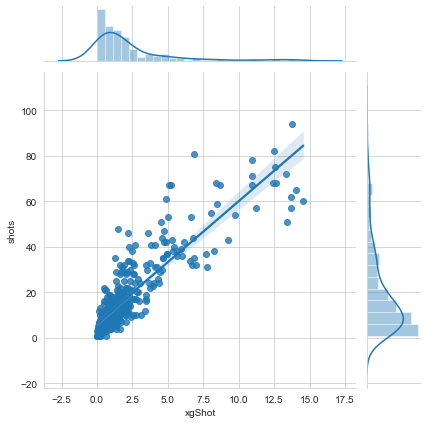

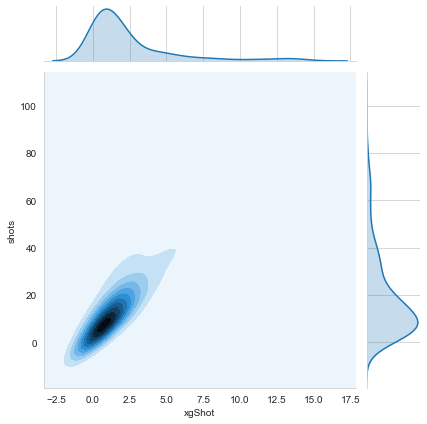

In [55]:
sns.jointplot(x='xgShot', y='shots', data =totalXgShots_df, kind = 'reg' )
sns.jointplot(x='xgShot', y='shots', data =totalXgShots_df, kind = 'kde' )

In [58]:
CC1 = np.corrcoef(totalXgShots_df.xgShot, totalXgShots_df.shots)
CC1

array([[1.        , 0.87885132],
       [0.87885132, 1.        ]])

### Correlation coefficient : xgShots vs goals

array([[1.        , 0.90725879],
       [0.90725879, 1.        ]])

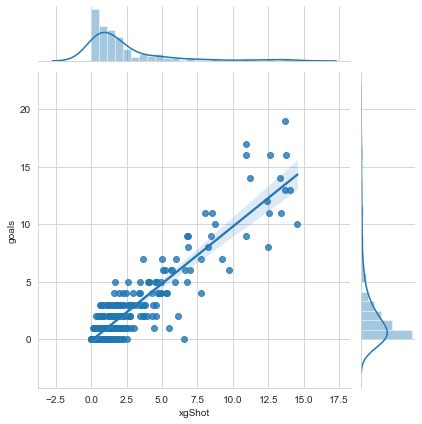

In [62]:
np.corrcoef(totalXgShots_df.xgShot, totalXgShots_df.goals)
sns.jointplot(x='xgShot', y='goals', data =totalXgShots_df, kind = 'reg' )

### Correlation coefficient : xgShots vs headShots

array([[1.        , 0.61478833],
       [0.61478833, 1.        ]])

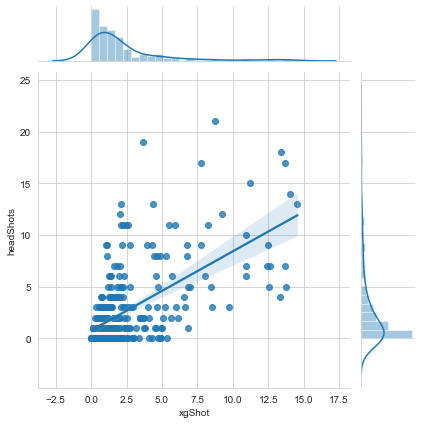

In [65]:
np.corrcoef(totalXgShots_df.xgShot, totalXgShots_df.headShots)
sns.jointplot(x='xgShot', y='headShots', data =totalXgShots_df, kind = 'reg' )

### Correlation coefficient : xgShots vs linkupPlays

array([[1.       , 0.7666106],
       [0.7666106, 1.       ]])

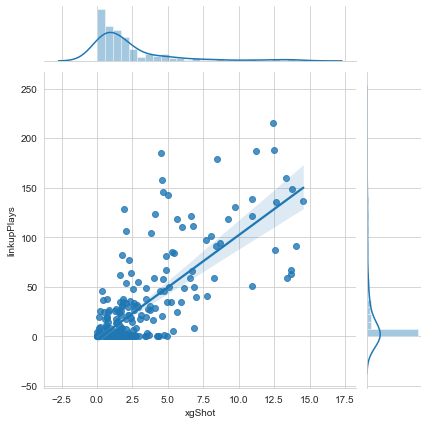

In [66]:
np.corrcoef(totalXgShots_df.xgShot, totalXgShots_df.linkupPlays)
sns.jointplot(x='xgShot', y='linkupPlays', data =totalXgShots_df, kind = 'reg' )

### Correlation coefficient : xgShots vs duels

array([[1.       , 0.4859339],
       [0.4859339, 1.       ]])

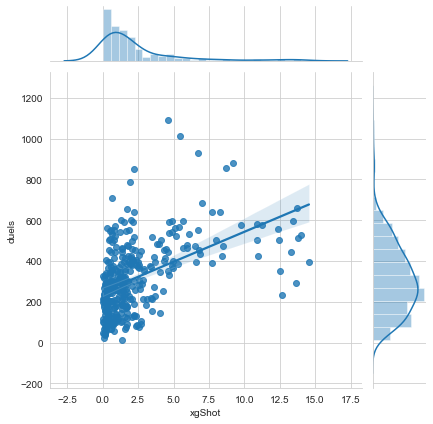

In [67]:
np.corrcoef(totalXgShots_df.xgShot, totalXgShots_df.duels)
sns.jointplot(x='xgShot', y='duels', data =totalXgShots_df, kind = 'reg' )

### Correlation coefficient : xgShots vs duelsWon

array([[1.        , 0.36725328],
       [0.36725328, 1.        ]])

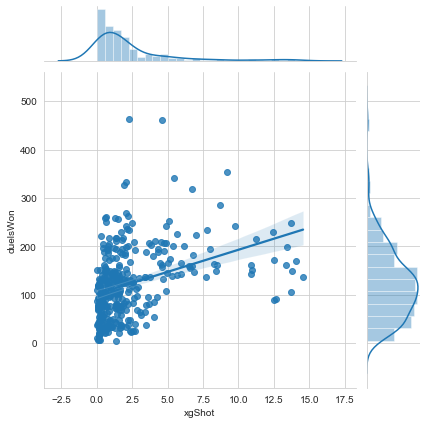

In [68]:
np.corrcoef(totalXgShots_df.xgShot, totalXgShots_df.duelsWon)
sns.jointplot(x='xgShot', y='duelsWon', data =totalXgShots_df, kind = 'reg' )

### Correlation coefficient : xgShots vs smartPasses

array([[1.        , 0.43616469],
       [0.43616469, 1.        ]])

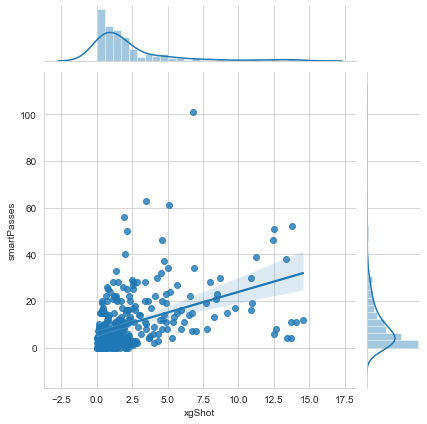

In [69]:
np.corrcoef(totalXgShots_df.xgShot, totalXgShots_df.smartPasses)
sns.jointplot(x='xgShot', y='smartPasses', data =totalXgShots_df, kind = 'reg' )

### Correlation coefficient : xgShots vs successfulLinkupPlays

array([[1.        , 0.74323663],
       [0.74323663, 1.        ]])

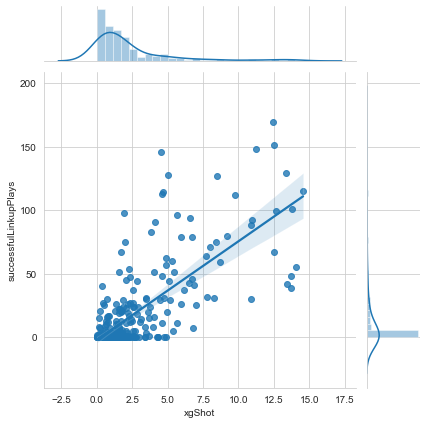

In [70]:
np.corrcoef(totalXgShots_df.xgShot, totalXgShots_df.successfulLinkupPlays)
sns.jointplot(x='xgShot', y='successfulLinkupPlays', data =totalXgShots_df, kind = 'reg' )

### Correlation coefficient : xgShots vs pressingDuels

array([[1.        , 0.73295939],
       [0.73295939, 1.        ]])

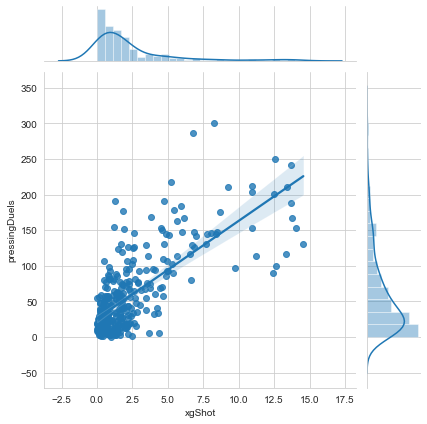

In [71]:
np.corrcoef(totalXgShots_df.xgShot, totalXgShots_df.pressingDuels)
sns.jointplot(x='xgShot', y='pressingDuels', data =totalXgShots_df, kind = 'reg' )

### Correlation coefficient : xgShots vs looseBallDuels

array([[1.        , 0.51660766],
       [0.51660766, 1.        ]])

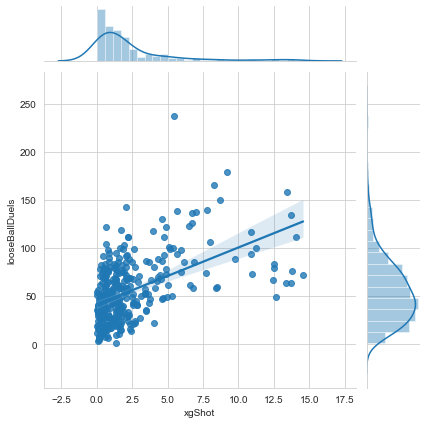

In [72]:
np.corrcoef(totalXgShots_df.xgShot, totalXgShots_df.looseBallDuels)
sns.jointplot(x='xgShot', y='looseBallDuels', data =totalXgShots_df, kind = 'reg' )

### Correlation coefficient : xgShots vs missedBalls

array([[1.        , 0.59315668],
       [0.59315668, 1.        ]])

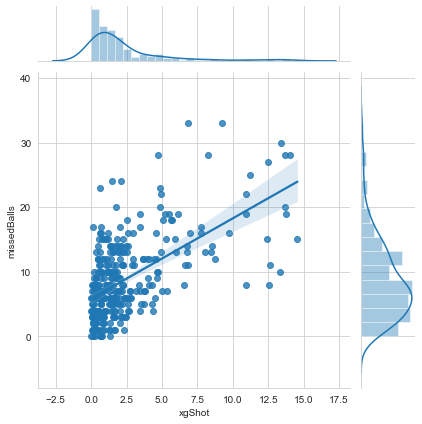

In [73]:
np.corrcoef(totalXgShots_df.xgShot, totalXgShots_df.missedBalls)
sns.jointplot(x='xgShot', y='missedBalls', data =totalXgShots_df, kind = 'reg' )

### Correlation coefficient : xgShots vs touchInBox

array([[1.        , 0.87177508],
       [0.87177508, 1.        ]])

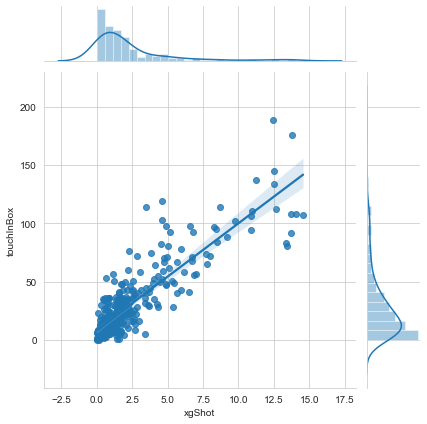

In [74]:
np.corrcoef(totalXgShots_df.xgShot, totalXgShots_df.touchInBox)
sns.jointplot(x='xgShot', y='touchInBox', data =totalXgShots_df, kind = 'reg' )

### Correlation coefficient : xgShots vs aerialDuels

array([[1.        , 0.36256265],
       [0.36256265, 1.        ]])

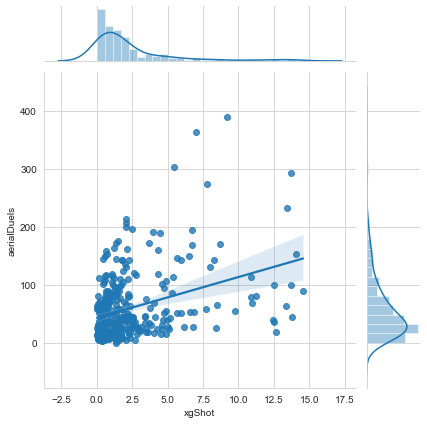

In [75]:
np.corrcoef(totalXgShots_df.xgShot, totalXgShots_df.aerialDuels)
sns.jointplot(x='xgShot', y='aerialDuels', data =totalXgShots_df, kind = 'reg' )

### Correlation coefficient : xgShots vs fouls

array([[1.        , 0.29989387],
       [0.29989387, 1.        ]])

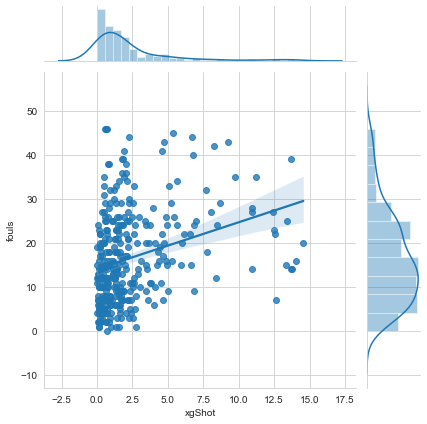

In [76]:
np.corrcoef(totalXgShots_df.xgShot, totalXgShots_df.fouls)
sns.jointplot(x='xgShot', y='fouls', data =totalXgShots_df, kind = 'reg' )

### Overall: goals, shots, headShots, linkupPlays, duels,duelsWon, smartPasses, successfulLinkupPlays, pressingDuels, looseBallDuels, missedBalls, touchInBox, aerialDuels & fouls are highly correlated to xgShot compared to other attributes